In [88]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
MODEL_PATH = "model.pkl"
TRAINING_DATA = "training.csv"

OUTPERFORMANCE = 10

In [89]:
data_df = pd.read_csv(TRAINING_DATA, index_col="Date")

In [90]:
def prepare_data(df):

    df.dropna(axis=0, how="any", inplace=True)

    features = df.columns[5:]
    display(features)
    display(features.shape)
    x = df[features]

    y = df['stock_p_change'] - df['SP500_p_change'] > OUTPERFORMANCE
    z = np.array(df[["stock_p_change", "SP500_p_change"]])
    return x, y, z

In [91]:
X, y, z = prepare_data(data_df)
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(
    X, y, z, test_size=0.2)

Index(['Market Cap', 'Enterprise Value', 'Trailing P/E', 'Forward P/E',
       'PEG Ratio', 'Price/Sales', 'Price/Book', 'Enterprise Value/Revenue',
       'Enterprise Value/EBITDA', 'Profit Margin', 'Operating Margin',
       'Return on Assets', 'Return on Equity', 'Revenue', 'Revenue Per Share',
       'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Total Cash',
       'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
       'Current Ratio', 'Book Value Per Share', 'Beta',
       '50-Day Moving Average', '200-Day Moving Average', 'Avg Vol (3 month)',
       'Shares Outstanding'],
      dtype='object')

(29,)

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.90      0.85       692
        True       0.79      0.64      0.71       411

    accuracy                           0.80      1103
   macro avg       0.80      0.77      0.78      1103
weighted avg       0.80      0.80      0.80      1103



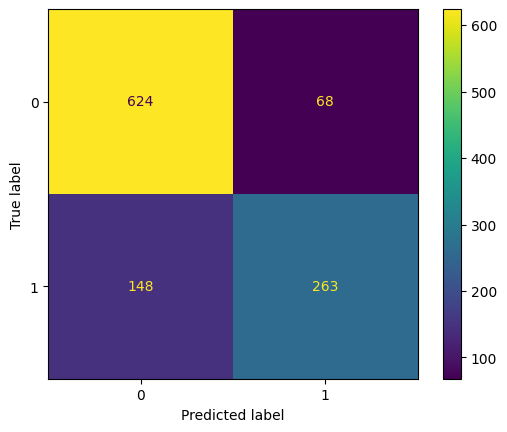

In [92]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [93]:
joblib.dump(model, MODEL_PATH)

['model.pkl']

In [94]:
stock_returns = 1 + z_test[y_pred, 0] / 100
market_returns = 1 + z_test[y_pred, 1] / 100

num_positive_predictions = sum(y_pred)

# Calculate the average growth for each stock we predicted 'buy'
# and the corresponding index growth
avg_predicted_stock_growth = sum(stock_returns) / num_positive_predictions
index_growth = sum(market_returns) / num_positive_predictions
percentage_stock_returns = 100 * (avg_predicted_stock_growth - 1)
percentage_market_returns = 100 * (index_growth - 1)
total_outperformance = percentage_stock_returns - percentage_market_returns

print("\n Stock prediction performance report \n", "=" * 40)
print(f"Total Trades:", num_positive_predictions)
print(f"Average return for stock predictions: {percentage_stock_returns: .1f} %")
print(
    f"Average market return in the same period: {percentage_market_returns: .1f}% "
)
print(
    f"Compared to the index, our strategy earns {total_outperformance: .1f} percentage points more"
)


 Stock prediction performance report 
Total Trades: 331
Average return for stock predictions:  44.3 %
Average market return in the same period:  8.3% 
Compared to the index, our strategy earns  36.0 percentage points more


Logistic Regression:

Accuracy: 0.6645
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.98      0.79       517
        True       0.59      0.05      0.09       267

    accuracy                           0.66       784
   macro avg       0.63      0.52      0.44       784
weighted avg       0.64      0.66      0.55       784



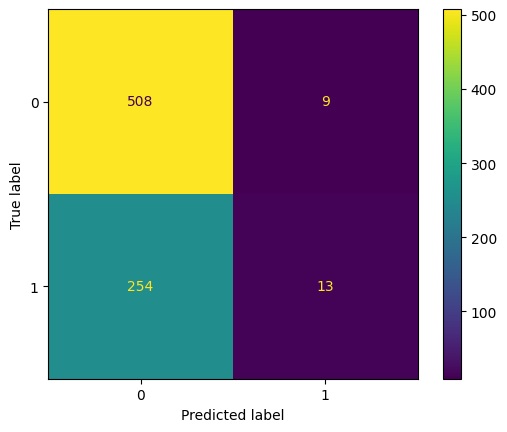

k-NN:

Accuracy: 0.7066
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.82      0.79       517
        True       0.58      0.48      0.53       267

    accuracy                           0.71       784
   macro avg       0.67      0.65      0.66       784
weighted avg       0.70      0.71      0.70       784



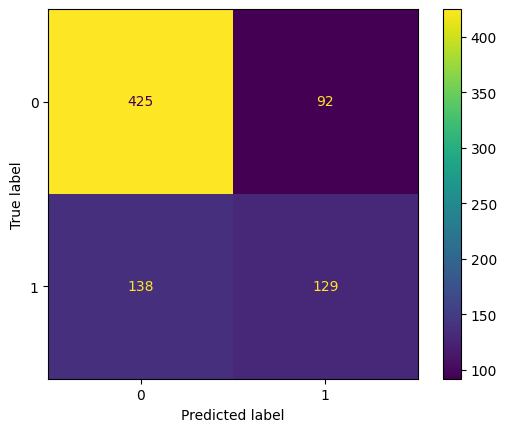

SVM:

Accuracy: 0.6594
Classification Report:
              precision    recall  f1-score   support

       False       0.66      1.00      0.79       517
        True       0.00      0.00      0.00       267

    accuracy                           0.66       784
   macro avg       0.33      0.50      0.40       784
weighted avg       0.43      0.66      0.52       784



c:\Users\Bogdan\Desktop\AlgoInvest\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bogdan\Desktop\AlgoInvest\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bogdan\Desktop\AlgoInvest\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

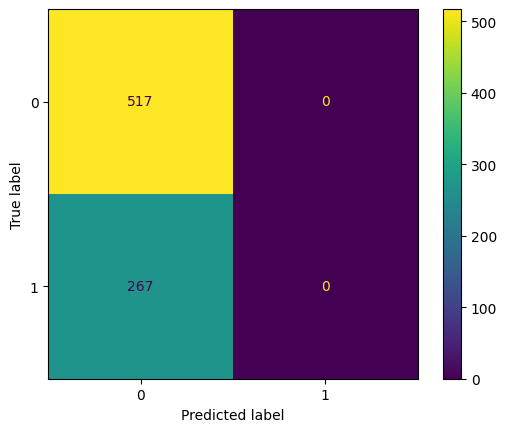

Decision Tree:

Accuracy: 0.7079
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.79      0.78       517
        True       0.57      0.55      0.56       267

    accuracy                           0.71       784
   macro avg       0.67      0.67      0.67       784
weighted avg       0.71      0.71      0.71       784



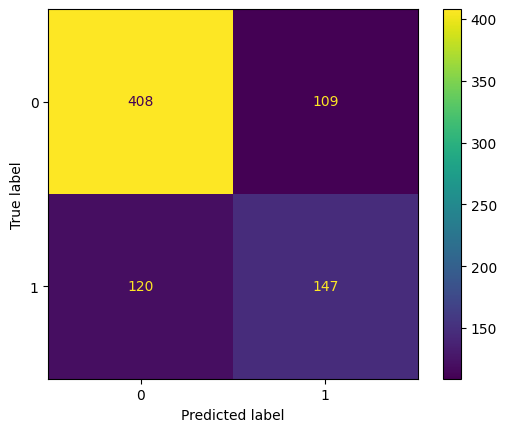

Random Forest:

Accuracy: 0.7870
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.93      0.85       517
        True       0.79      0.51      0.62       267

    accuracy                           0.79       784
   macro avg       0.79      0.72      0.74       784
weighted avg       0.79      0.79      0.77       784



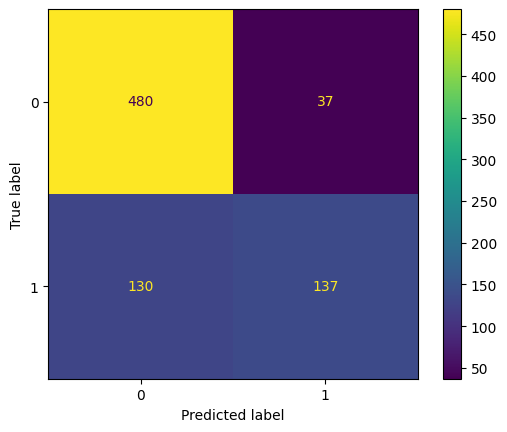

Neural Network:

Accuracy: 0.7156
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.87      0.80       517
        True       0.62      0.42      0.50       267

    accuracy                           0.72       784
   macro avg       0.68      0.64      0.65       784
weighted avg       0.70      0.72      0.70       784



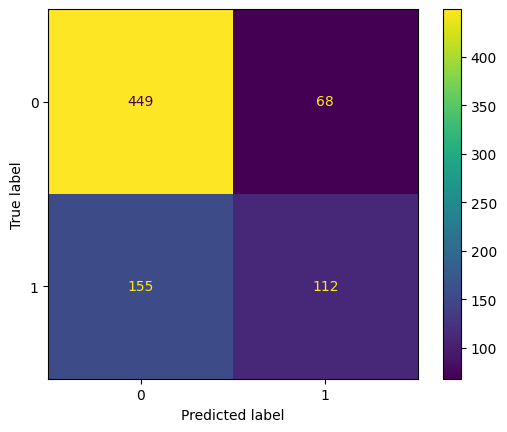

In [10]:
def test_many_models():
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPClassifier

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    # Assuming X and y are your features and labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dimensionality reduction
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Dictionary of classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'k-NN': KNeighborsClassifier(n_neighbors=5),
        'SVM': SVC(kernel='linear'),  # Change to 'linear' for faster computation
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'Neural Network': MLPClassifier(max_iter=1000),
    }

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train_pca, y_train)
        predictions = clf.predict(X_test_pca)
        print(f"{name}:\n")
        print(f"Accuracy: {clf.score(X_test_pca, y_test):.4f}")
        print("Classification Report:")
        print(classification_report(y_test, predictions))
        
        cm = confusion_matrix(y_test, predictions)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
        cm_display.plot()
        plt.show()

test_many_models()

                     feature  importance
21         Total Debt/Equity    0.044092
10          Operating Margin    0.040856
1           Enterprise Value    0.038580
28        Shares Outstanding    0.037207
22             Current Ratio    0.037001
24                      Beta    0.036708
20                Total Debt    0.035961
8    Enterprise Value/EBITDA    0.035716
3                Forward P/E    0.035672
0                 Market Cap    0.035154
13                   Revenue    0.034675
23      Book Value Per Share    0.034437
27         Avg Vol (3 month)    0.034176
26    200-Day Moving Average    0.034111
25     50-Day Moving Average    0.034013
19      Total Cash Per Share    0.033995
14         Revenue Per Share    0.033908
11          Return on Assets    0.033765
4                  PEG Ratio    0.033616
6                 Price/Book    0.033534
5                Price/Sales    0.033341
15                    EBITDA    0.032859
16  Net Income Avl to Common    0.032045
12          Retu

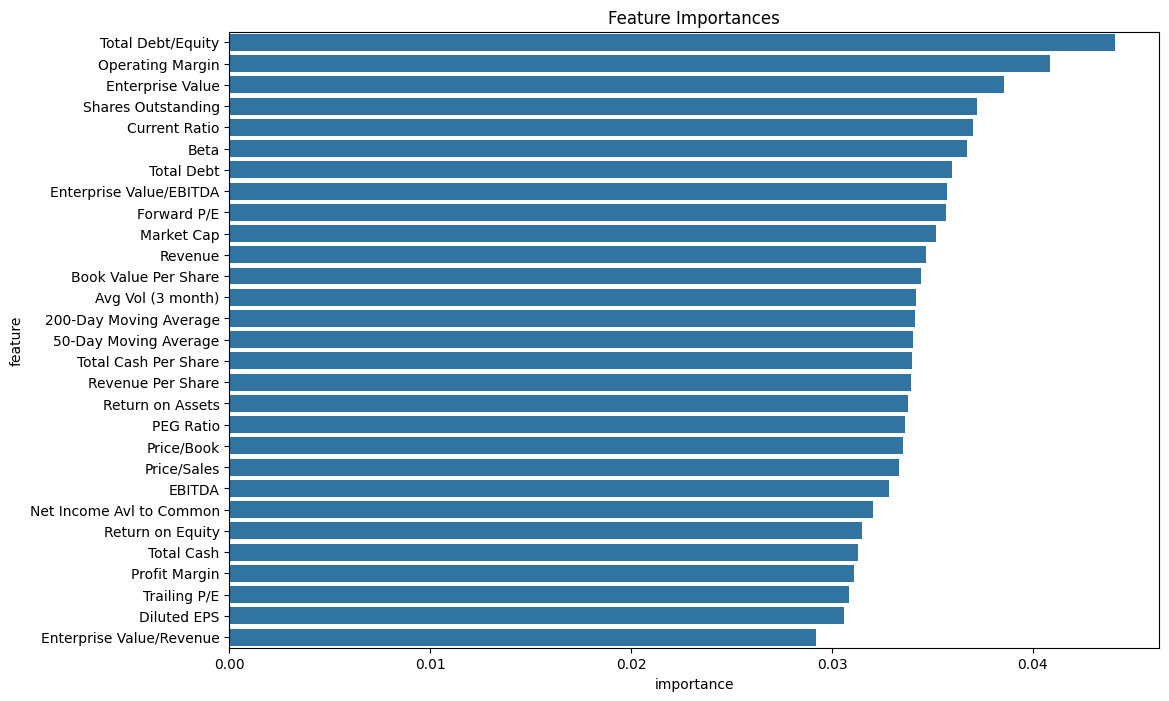

In [96]:
model = joblib.load(MODEL_PATH)

# Step 2: Access feature importances
importances = model.feature_importances_
feature_names = ['Market Cap', 'Enterprise Value', 'Trailing P/E', 'Forward P/E',
       'PEG Ratio', 'Price/Sales', 'Price/Book', 'Enterprise Value/Revenue',
       'Enterprise Value/EBITDA', 'Profit Margin', 'Operating Margin',
       'Return on Assets', 'Return on Equity', 'Revenue', 'Revenue Per Share', 'EBITDA',
       'Net Income Avl to Common', 'Diluted EPS', 'Total Cash',
       'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
       'Current Ratio', 'Book Value Per Share', 'Beta',
       '50-Day Moving Average', '200-Day Moving Average', 'Avg Vol (3 month)',
       'Shares Outstanding']

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print feature importances
print(feature_importances)

# Step 4: Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()